In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# statistically transform normal distripution

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# check cholestrol

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

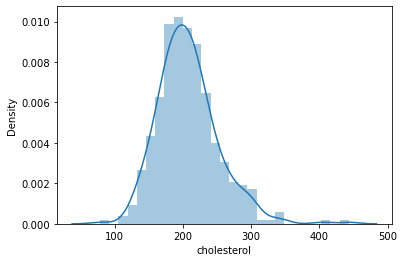

In [4]:
sns.distplot(data['cholesterol'])

In [5]:
from scipy.stats import skew,kurtosis,stats

In [6]:
print(skew(data['cholesterol']))

0.958073536033721


In [7]:
mean = data['cholesterol'].mean()
median = data['cholesterol'].median()

In [8]:
mean

207.23076923076923

In [9]:
median

203.0

In [10]:
#mean median not same is not normal distripution

In [11]:
mean>median

True

In [12]:
mean<median

False

In [13]:
#mean is greater then median that is postive skewness

In [14]:
print(kurtosis(data['cholesterol']))

2.63021972566386


In [15]:
#kurtosis less then 3 that is sort tail

In [16]:
import scipy.stats as stats

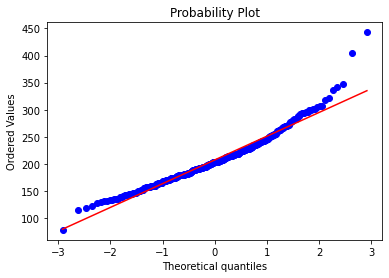

In [17]:
#before transform
fig = plt.subplots(1)
stats.probplot(data['cholesterol'],dist = 'norm',plot = plt)
plt.show()

In [18]:
#apply log transform

In [19]:
data['cholesterol'] = np.log(data['cholesterol'])

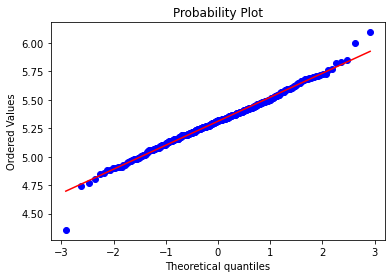

In [20]:
#ofter transform
fig = plt.subplots(1)
stats.probplot(data['cholesterol'] ,dist = 'norm',plot = plt)
plt.show()

In [21]:
skew(data['cholesterol'] )

-0.033060219777668265

In [22]:
data['cholesterol'].mean()

5.311605169264332

In [23]:
data['cholesterol'].median()

5.313205979041787

In [24]:
#mean medain is also same  but QQ plot see same outlier

In [25]:
#mean == median is normaly diatriputed

In [26]:
#zscore remove the outliers

In [27]:
data['zscore'] = (data['cholesterol']  - data['cholesterol'].mean()) / data['cholesterol'].std()

In [28]:
data['zscore']

0     -0.231914
1     -1.555092
2      0.323784
3      0.516453
4     -1.003886
         ...   
385    0.537385
386    0.516453
387    1.875151
388    0.640683
389   -0.975064
Name: zscore, Length: 390, dtype: float64

In [29]:
 df = data[(data['zscore'] > -3.0) & (data['zscore'] < 3.0)]

In [30]:
#std -3 to 3 is normal distripution that way remove the data

In [31]:
df

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,zscore
0,1,5.262690,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes,-0.231914
1,2,4.983607,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes,-1.555092
2,3,5.379897,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes,0.323784
3,4,5.420535,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes,0.516453
4,5,5.099866,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes,-1.003886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,5.424950,105,44,"5,2",83,female,59,125,"25,2",150,90,35,40,"0,88",No diabetes,0.537385
386,387,5.420535,279,52,"4,3",84,female,60,192,"37,5",144,88,41,48,"0,85",Diabetes,0.516453
387,388,5.707110,90,118,"2,6",89,female,61,115,"21,7",218,90,31,41,"0,76",No diabetes,1.875151
388,389,5.446737,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes,0.640683


In [32]:
m = df['zscore']

In [33]:
m

0     -0.231914
1     -1.555092
2      0.323784
3      0.516453
4     -1.003886
         ...   
385    0.537385
386    0.516453
387    1.875151
388    0.640683
389   -0.975064
Name: zscore, Length: 387, dtype: float64

In [34]:
round(m.mean())

0

In [35]:
round(m.median())

0

In [36]:
#mean,median is 0 normal distripution

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zscore'>

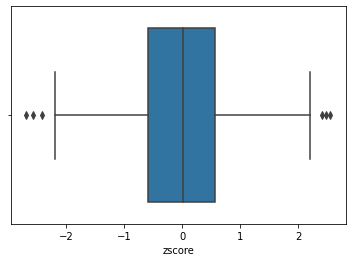

In [37]:
sns.boxplot(m)

In [38]:
#see same outlier is ofter zscore

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zscore', ylabel='Density'>

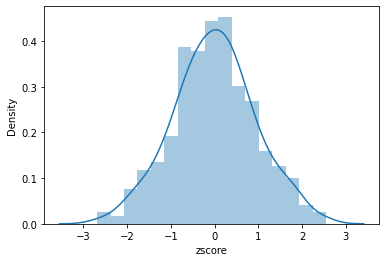

In [39]:
sns.distplot(m)

In [40]:
d = data['zscore'].dropna()

In [41]:
d.isnull().sum()

0

In [42]:
d = d.astype(int)

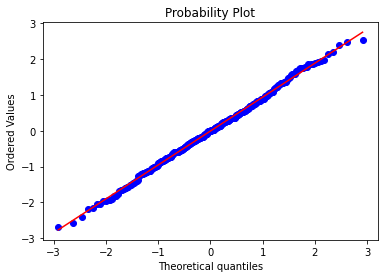

In [43]:

fig = plt.subplots(1)
stats.probplot(m,dist = 'norm',plot = plt)
plt.show()

In [44]:
#now is good fit tha data point in line